## Preparation

### Load Dataset

In [2]:
import pandas as pd

# Load the cleaned dataset
df_supervised = pd.read_csv("cleaned_supervised_data.csv")

# Confirm successful loading
print(df_supervised.head())



   FAVC  CAEC  CALC        BMI  FCVC  NObeyesdad
0     0     1     0  24.386526   2.0           1
1     0     1     1  24.238227   3.0           1
2     0     1     2  23.765432   2.0           1
3     0     1     2  26.851852   3.0           2
4     0     1     1  28.342381   2.0           3


### Split Dataset into Features (X) and Target (y)

In [3]:
# Define features (X) and target variable (y)
X = df_supervised.drop(columns=["NObeyesdad"])  # Drop target variable
y = df_supervised["NObeyesdad"]  # Target variable

# Verify shapes
print(f"Feature Matrix (X) Shape: {X.shape}")
print(f"Target Vector (y) Shape: {y.shape}")


Feature Matrix (X) Shape: (2111, 5)
Target Vector (y) Shape: (2111,)


### Split Dataset into Training & Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate percentages
train_percentage = (X_train.shape[0] / X.shape[0]) * 100
test_percentage = (X_test.shape[0] / X.shape[0]) * 100

# Print verification details
print(f"Training Set: {X_train.shape[0]} samples ({train_percentage:.2f}%)")
print(f"Test Set: {X_test.shape[0]} samples ({test_percentage:.2f}%)")
print(f"Total Dataset Size: {X.shape[0]} samples")


Training Set: 1688 samples (79.96%)
Test Set: 423 samples (20.04%)
Total Dataset Size: 2111 samples


### Check Standardisation

In [5]:
import numpy as np

# List of continuous variables (update if needed)
numerical_features = ["BMI", "FCVC"]

# Check if standardisation has already been applied
mean_values = X_train[numerical_features].mean()
std_values = X_train[numerical_features].std()

print("\n📊 Standardisation Check:")
for feature in numerical_features:
    print(f"{feature}: Mean = {mean_values[feature]:.4f}, Std Dev = {std_values[feature]:.4f}")

# Decide if standardisation is needed
if all(np.isclose(mean_values, 0, atol=0.1)) and all(np.isclose(std_values, 1, atol=0.1)):
    print("\n✅ Standardisation already applied. Proceeding without re-scaling.")
    X_train_scaled, X_test_scaled = X_train, X_test  # Use existing values
else:
    print("\n⚠️ Standardisation NOT applied. Scaling features now...")
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled = scaler.transform(X_test[numerical_features])

    # Convert back to DataFrame to retain column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

    print("\n✅ Standardisation complete. Continuous variables have been scaled.")




📊 Standardisation Check:
BMI: Mean = 29.7082, Std Dev = 7.9819
FCVC: Mean = 2.4219, Std Dev = 0.5371

⚠️ Standardisation NOT applied. Scaling features now...

✅ Standardisation complete. Continuous variables have been scaled.


### Reimporting the libraries

In [6]:
# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


### Train Multiple Supervised Learning Models

In [7]:
# Define models with optimised Logistic Regression settings
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='saga'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train_scaled, y_train)  # Train model on correctly scaled data
    y_pred = model.predict(X_test_scaled)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store results
    print(f"✅ {name}: Accuracy = {accuracy:.4f}")  # Print model performance

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print model ranking
print("\n📊 Model Performance Ranking:")
print(results_df)




🚀 Training Logistic Regression...
✅ Logistic Regression: Accuracy = 0.9243

🚀 Training Random Forest...
✅ Random Forest: Accuracy = 0.9669

🚀 Training SVM...
✅ SVM: Accuracy = 0.9456

🚀 Training K-Nearest Neighbours...
✅ K-Nearest Neighbours: Accuracy = 0.9574

🚀 Training Decision Tree...
✅ Decision Tree: Accuracy = 0.9527

📊 Model Performance Ranking:
                      Accuracy
Random Forest         0.966903
K-Nearest Neighbours  0.957447
Decision Tree         0.952719
SVM                   0.945626
Logistic Regression   0.924350


### Visualisation for the Report

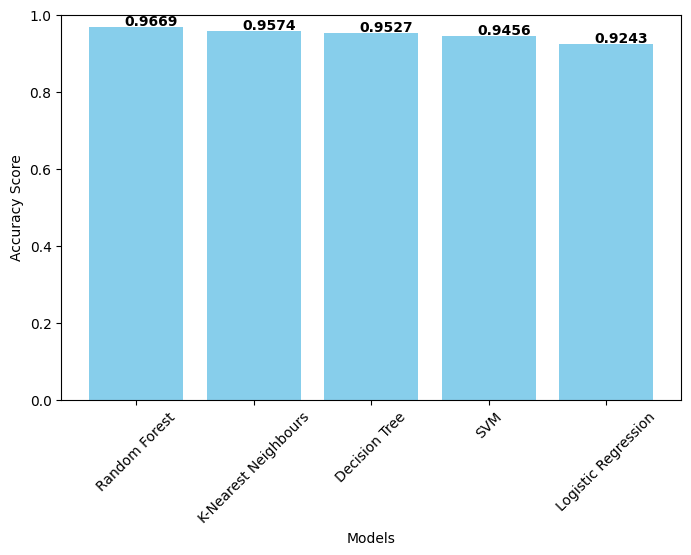

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy of each model
plt.figure(figsize=(8,5))
bars = plt.bar(results_df.index, results_df["Accuracy"], color='skyblue')

# Add accuracy values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1,  # X position (center of the bar)
             bar.get_height() + 0.005,              # Y position (slightly above the bar)
             f"{bar.get_height():.4f}",             # Accuracy value (formatted to 4 decimals)
             fontsize=10, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Keeps the scale consistent
plt.show()


# Evaluating the models

### Running the classification report

In [9]:
from sklearn.metrics import classification_report

# Identify best model from ranking
best_model_name = results_df.index[0]
best_model = models[best_model_name]

# Generate predictions using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Print classification report
print(f"\n📋 Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))



📋 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.98      0.96        62
           2       1.00      0.93      0.96        56
           3       0.96      0.98      0.97        50
           4       0.96      0.96      0.96        78
           5       0.93      0.97      0.95        58
           6       1.00      0.98      0.99        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



### Code to Generate a Classification Report Heatmap

Index(['Insufficient Weight', 'Normal Weight', 'Overweight Level I',
       'Overweight Level II', 'Obesity Type I', 'Obesity Type II',
       'Obesity Type III', 'Accuracy', 'Macro Average', 'Weighted Average'],
      dtype='object')


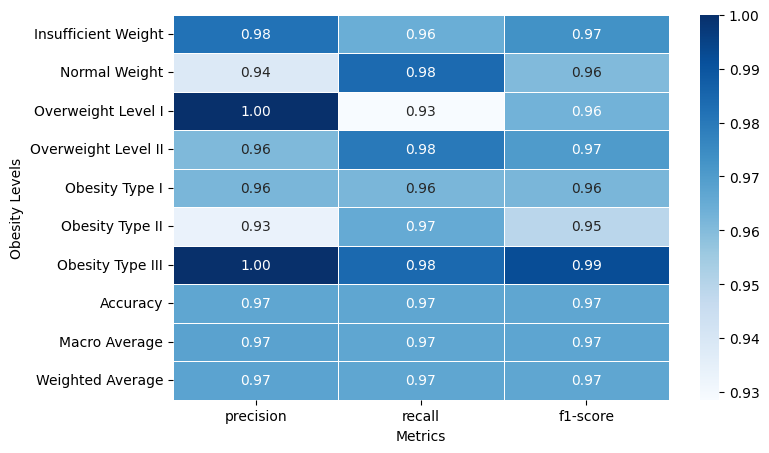

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report dictionary
report_dict = classification_report(y_test, y_pred_best, output_dict=True)

# Convert to DataFrame (excluding support column)
report_df = pd.DataFrame(report_dict).T.drop(columns=["support"])

# Convert index to strings (ensures correct mapping)
report_df.index = report_df.index.map(str)

# Define a mapping of numerical classes to obesity categories
class_labels = {
    "0": "Insufficient Weight",
    "1": "Normal Weight",
    "2": "Overweight Level I",
    "3": "Overweight Level II",
    "4": "Obesity Type I",
    "5": "Obesity Type II",
    "6": "Obesity Type III",
    "accuracy": "Accuracy",
    "macro avg": "Macro Average",
    "weighted avg": "Weighted Average"
}

# Rename index using the mapping
report_df.rename(index=class_labels, inplace=True)

# Verify renaming worked (optional)
print(report_df.index)

# Create heatmap
plt.figure(figsize=(8,5))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Titles & Labels

plt.xlabel("Metrics")
plt.ylabel("Obesity Levels")

# Show plot
plt.show()


